# Filterkategorisierung / Erkennen von Filtern mit Machine Learning

Ein Projekt von:

**Erik Jansky (5980253),**
**Dennis Köhler (8900967)** und 
**Martin Sandig (8857640)**

## Idee

Die Idee dieses Projekts ist, eine Filtererkennung mit Hilfe von Convolutional Neural Networks (CNNs) zu ermöglichen. 
Hierzu wird das [Filter Aesthetic Comparison Dataset (FACD)](https://wtwilsonsun.github.io/FACD/) von Wei-Tse Sun, Ting-Hsuan Chao, Yin-Hsi Kuo, Winston Hsu verwendet.  

Das Dataset besteht aus 23 verschiedenen Klassen (Filter - inkl. Original-Bilder) mit jeweils 1280 Bildern. Alle Klassen bauen dabei auf den gleichen Originalbildern auf. Die Filter orientieren sich dabei an den typischen Instagramm-Filtern. Zur Erstellung der Bilder wurde dabei das GimpToolkit verwendet.

## Ziel

Ziel dieses Projekts ist es, herauszufinden ob es möglich ist, Bilder auf die Verwendung von Filtern überprüfen bzw. die angewandten Filter klassifizieren zu können. Dies soll unter der Verwendung von verschiedenen Methoden des Machine Learning, darunter Convolutional Neural Networks und Decision Trees geschehen. 

## Aufbau

Das Projekt selbst ist in mehrere Jupyter-Notebooks aufgeteilt, in welchen verschiedene Klassifikationsalgorithmen getestet werden.

Die verwendeten Algorithmen sind:
- DecisionTree
- RandomForest
- Convolutional Neural Networks

Hierbei werden bei den verschiedenen Algorithmen ebenfalls unterschiedliche Herangehensweisen ausprobiert. So werden zum Beispiel verschiedene Methoden des Image Preprocessings miteinander verglichen (RBG vs. Grayscale). Zudem werden verschiedene Werte für die Parameter bei der Modellerstellung / Modelltraining ausprobiert und so miteinander verglichen. 

Im nachfolgenden Teil dieses Notebooks sind die Ergebnisse der Convolutional Neural Networks zusammengefasst, indem alle trainierten Modells mit selbsterstellten Testbildern validiert werden. Die Ergebnisse werden jeweils in Form einer Confusion-Matrix abgebildet.

## Import Packages

In [1]:
# Import Helpers and Plots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

## Laden und Testen der Modelle

Leider wurde zu spät festgestellt, dass man mit dem Tool "pickle" mit sklearn erzeugte Modelle in Dateien speichern kann. Dies war uns insbesondere für die Decision Trees und den Random Forest nicht mehr möglich, da der Rechner zum Trainieren dieser rechenintensiven Modelle (RAM ~32GB + SwapSpace) nicht mehr zur Verfügung stand.

Lediglich die Keras / Tensorflow Modelle wurden während / nach dem trainieren gespeichert und können im Folgenden importiert und getestet werden.

### Laden der Testbilder

An dieser Stelle werden die selbst erstellten Testbilder importiert. Hierfür werden die Preprocessing-Maßnahmen der trainierten Keras-Modelle verwendet, um die Testbilder für die Prediction vorzubereiten. 

In [2]:
data_generator_vgg16 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
)

data_generator_gray = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

target_size = (224,224) 
test_data_path = "./testbilder"


iterator_rgb_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_vgg16, target_size=target_size, color_mode='rgb', class_mode='categorical',batch_size=5
)


iterator_rgb_five_classes = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_vgg16, target_size=target_size, color_mode='rgb', class_mode='categorical',batch_size=5,
    classes=["1977", "Amaro", "Apollo", "Brannan", "Earlybird"]
)

iterator_gray_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_gray, target_size=target_size, color_mode='grayscale', class_mode='categorical',
    batch_size=5
)

iterator_gray_two_classes = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_gray, target_size=(400,400), color_mode='grayscale', class_mode='categorical',
    batch_size=5, classes=["Origin", "Amaro"]
)

Found 115 images belonging to 23 classes.
Found 25 images belonging to 5 classes.
Found 115 images belonging to 23 classes.
Found 10 images belonging to 2 classes.


# Liste der Modelle

<a href="#1"> <h2> 1. Originalbild vs. Filter (Grayscale)</h2> </a>
<a href="#2"> <h2> 2. Fünf Filter mit geringer Layeranzahl (RGB)</h2> </a>
<a href="#3"> <h2> 3. Alle Filter mit geringer Layeranzahl - geringe Batch-Size (RGB)</h2> </a>
<a href="#4"> <h2> 4. Alle Filter mit geringer Layeranzahl - höhere Batch-Size  (RGB)</h2> </a>
<a href="#5"> <h2> 5. Alle Filter mit geringer Layeranzahl - höhere Batch-Size  (Grayscale)</h2> </a>
<a href="#6"> <h2> 6. Alle Filter mit größerer Layeranzahl (RGB)</h2> </a>

<div id="1"> </div>

## 1. Originalbild vs. Filter (Grayscale)

In [11]:
keras_one_filter_compared_original_grayscale = tf.keras.models.load_model('keras_one_filter_compared_original_grayscale.hdf5')

C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


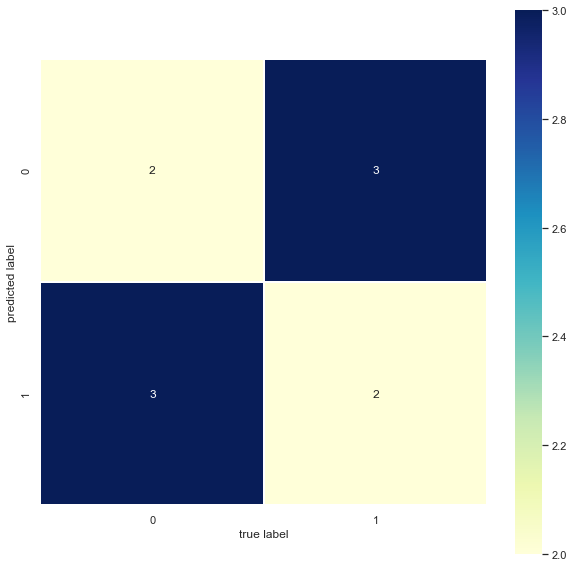

In [12]:
prediction = keras_one_filter_compared_original_grayscale.predict(iterator_gray_two_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_gray_two_classes.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

<div id="2"> </div>

## 2. Fünf Filter mit geringer Layeranzahl (RGB) 

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


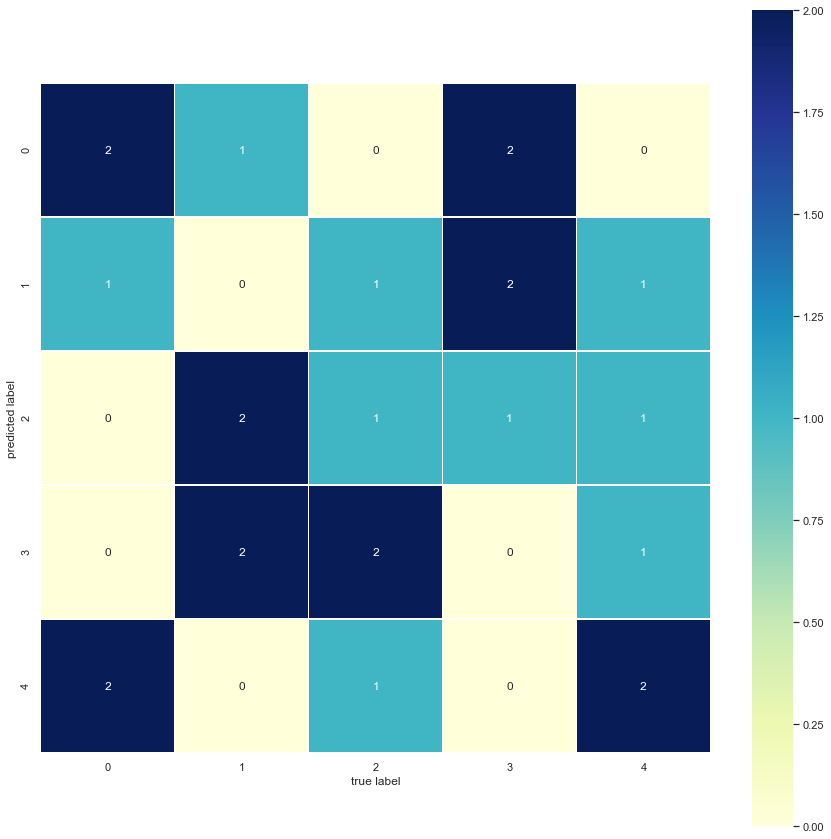

In [4]:
keras_five_filters_color_few_layers = tf.keras.models.load_model('keras_five_filters_color_few_layers.hdf5')

prediction = keras_five_filters_color_few_layers.predict(iterator_rgb_five_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_five_classes.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

<div id="3"> </div>

## 3. Alle Filter mit geringer Layeranzahl - geringe Batch-Size (RGB)

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


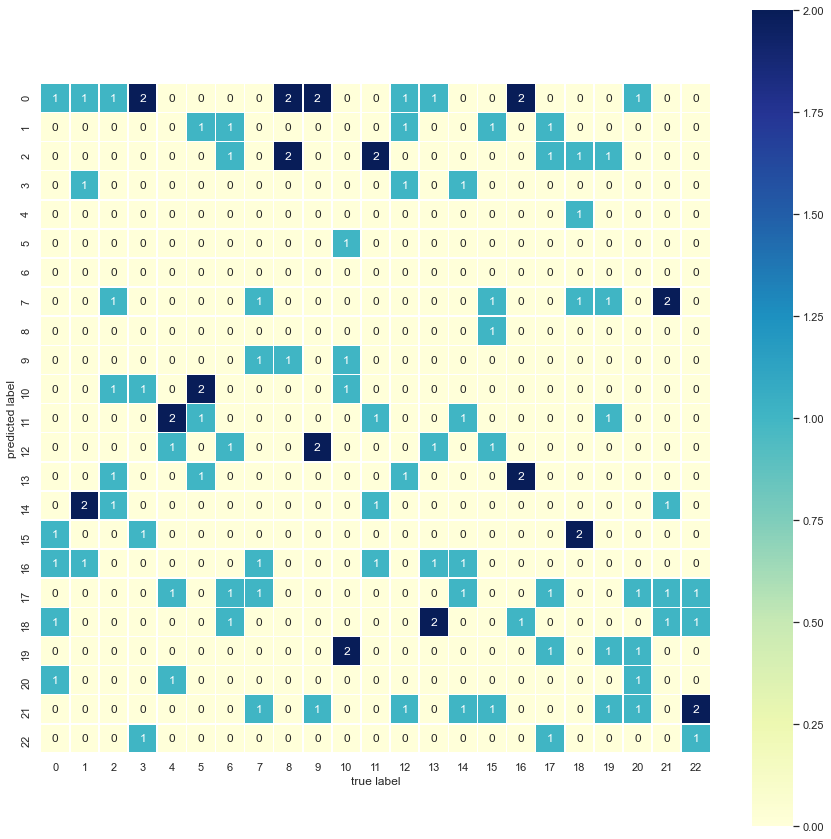

In [17]:
keras_all_filters_color_few_layers = tf.keras.models.load_model('keras_all_filters_color_few_layers.hdf5')
prediction = keras_all_filters_color_few_layers.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

<div id="4"> </div>

## 4. Alle Filter mit geringer Layeranzahl - höhere Batch-Size  (RGB)

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


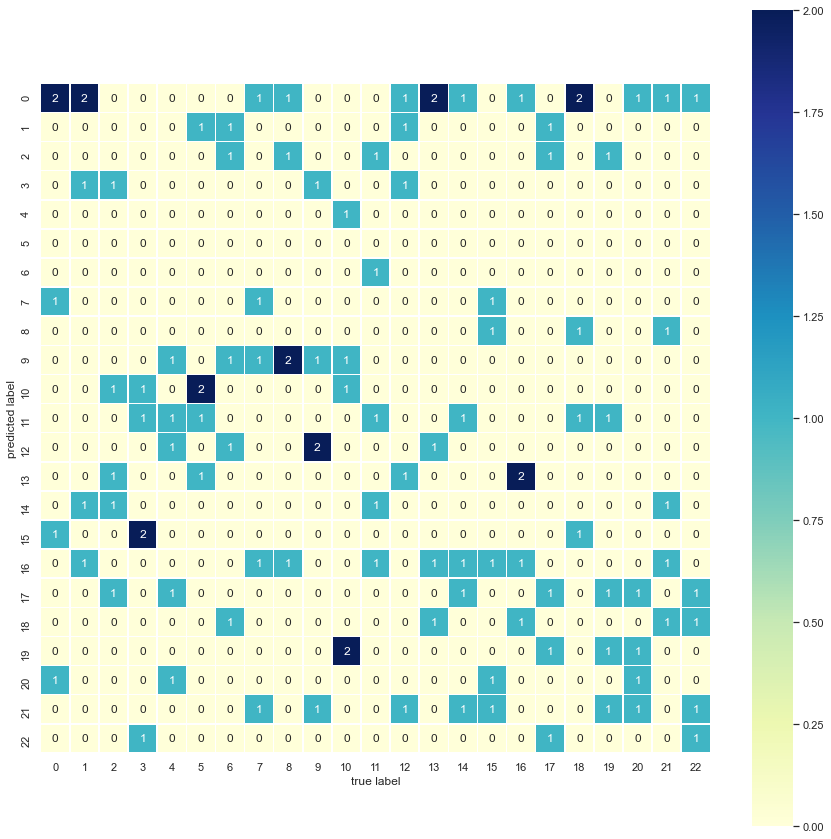

In [15]:
keras_all_filters_color_few_layers_highBatchSize = tf.keras.models.load_model('keras_all_filters_color_few_layers_highBatchSize.hdf5')
prediction = keras_all_filters_color_few_layers_highBatchSize.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

<div id="5"> </div>

## 5. Alle Filter mit geringer Layeranzahl - höhere Batch-Size  (Grayscale) 

C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


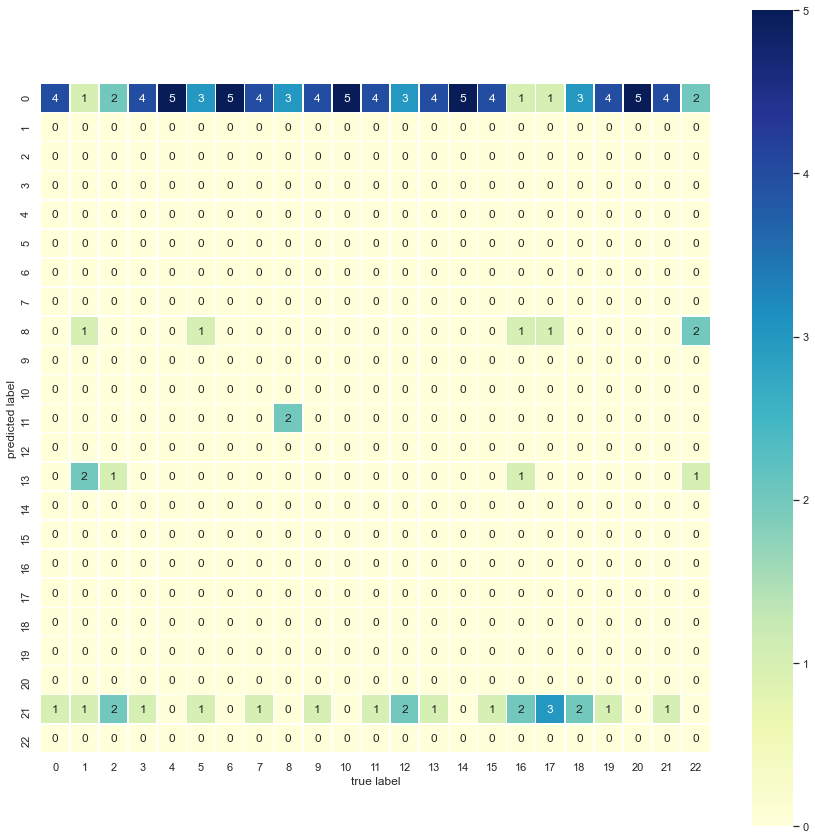

In [16]:
keras_all_filters_grayscale_few_layers_highBatchSize = tf.keras.models.load_model('keras_all_filters_grayscale_few_layers_highBatchSize.hdf5')
prediction = keras_all_filters_grayscale_few_layers_highBatchSize.predict(iterator_gray_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_gray_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

<div id="6"> </div>

## 6. Alle Filter mit größerer Layeranzahl (RGB)

In [5]:
keras_all_filters_color_many_layers = tf.keras.models.load_model('keras_all_filters_color_many_layers.hdf5')

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


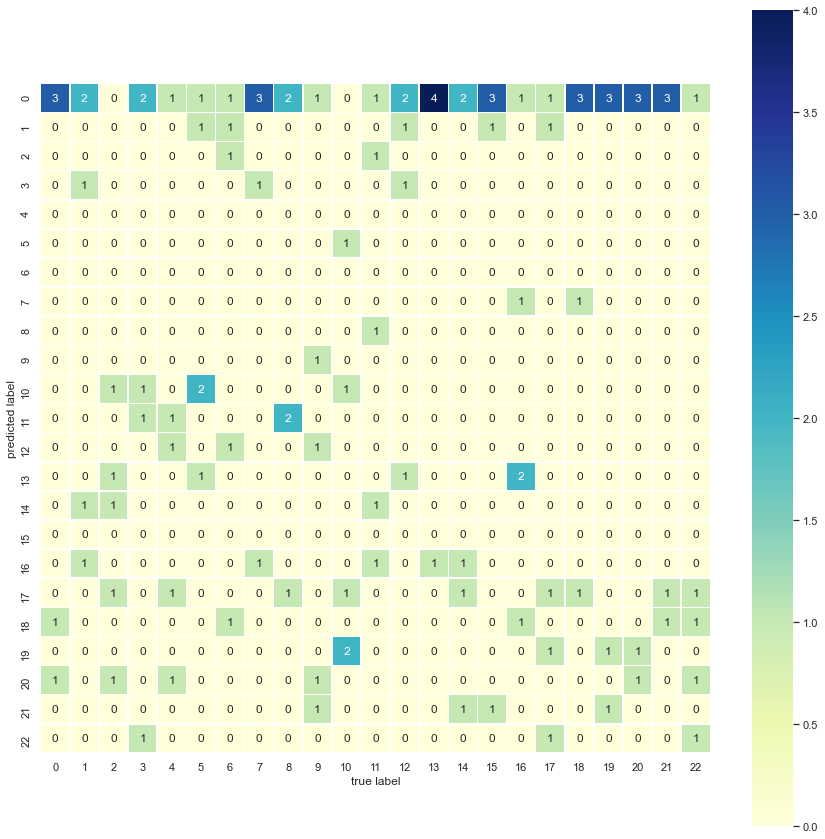

In [6]:
prediction = keras_all_filters_color_many_layers.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

## Ergebnis

Wie sich zeigt performen die bisher trainierten Modelle deutlich schlechter als erwartet.  Auch wenn mehrere verschiedene Ansätze verfolgt wurden und verschiedene Parameter für Training und Preprocessing ausgewählt wurden, konnte das gewünschte Ergebnis nicht erreicht werden.


{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


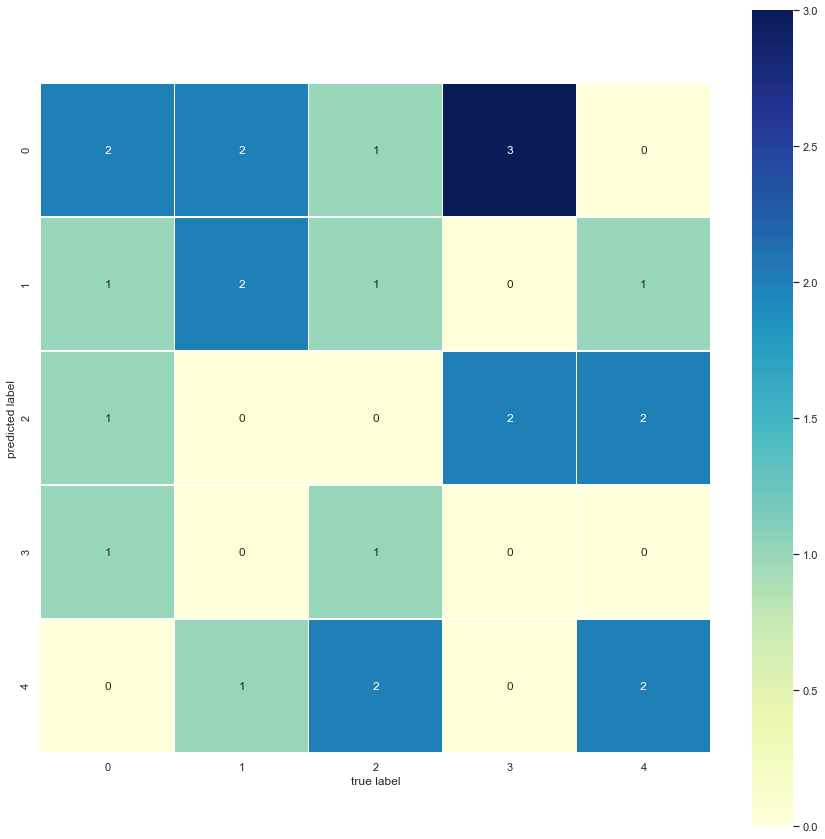

In [3]:
keras_five_filters_color_few_layers = tf.keras.models.load_model('testingFurtherImprovement.hdf5')

prediction = keras_five_filters_color_few_layers.predict(iterator_rgb_five_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_five_classes.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)